In [103]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt

In [207]:
df = pd.read_csv('C-19 Indonesia Kasus Harian dan Vaksinasi 2.csv')

__Data is up to date untill 22nd August 2021__

In [208]:
df.head()

,Tanggal,Kasus harian,Total kasus,Kasus aktif,Sembuh Harian,Total Sembuh,Meninggal Harian,Total Meninggal,Jumlah orang diperiksa,Negatif,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Dosis pertama,Dosis kedua,Dosis ketiga
0,2-Mar-20,2,2,2,0,0,0,0,339,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3-Mar-20,0,2,2,0,0,0,0,341,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4-Mar-20,0,2,2,0,0,0,0,372,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5-Mar-20,0,2,2,0,0,0,0,388,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-Mar-20,2,4,4,0,0,0,0,450,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [210]:
df.tail()

,Tanggal,Kasus harian,Total kasus,Kasus aktif,Sembuh Harian,Total Sembuh,Meninggal Harian,Total Meninggal,Jumlah orang diperiksa,Negatif,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Dosis pertama,Dosis kedua,Dosis ketiga
533,2021-08-18,15768,3908247,343203,29794,3443903,1128,121141,20070696,16162449,63083.0,74099.0,25001.0,53625.0,54992421.0,29527386.0,297422.0
534,2021-08-19,22053,3930300,334752,29012,3472915,1492,122633,20185804,16255504,103163.0,111247.0,39733.0,75375.0,55637234.0,30230233.0,329507.0
535,2021-08-20,20004,3950304,327286,26122,3499037,1348,123981,20299651,16349347,101685.0,100799.0,38095.0,75752.0,55995182.0,30585478.0,365335.0
536,2021-08-21,16744,3967048,319658,23011,3522048,1361,125342,20415957,16448909,94985.0,105265.0,37275.0,79031.0,57282879.0,31566685.0,423627.0
537,2021-08-22,12408,3979456,306760,24276,3546324,1030,126372,20501173,16521717,76742.0,71668.0,31691.0,53525.0,57338901.0,31601400.0,424625.0


In [211]:
df.shape

(538, 17)

In [212]:
df.replace(np.nan, 0, inplace=True)
df.head()

,Tanggal,Kasus harian,Total kasus,Kasus aktif,Sembuh Harian,Total Sembuh,Meninggal Harian,Total Meninggal,Jumlah orang diperiksa,Negatif,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Dosis pertama,Dosis kedua,Dosis ketiga
0,2020-03-02,2,2,2,0,0,0,0,339,335,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-03,0,2,2,0,0,0,0,341,337,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-04,0,2,2,0,0,0,0,372,356,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-05,0,2,2,0,0,0,0,388,371,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-06,2,4,4,0,0,0,0,450,422,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
df.dtypes

Tanggal                       datetime64[ns]
Kasus harian                           int64
Total kasus                            int64
Kasus aktif                            int64
Sembuh Harian                          int64
Total Sembuh                           int64
Meninggal Harian                       int64
Total Meninggal                        int64
Jumlah orang diperiksa                 int64
Negatif                                int64
Spesimen (PCR-TCM)                   float64
Spesimen (Antigen)                   float64
Orang yang dites (PCR-TCM)           float64
Orang yang dites (Antigen)           float64
Dosis pertama                        float64
Dosis kedua                          float64
Dosis ketiga                         float64
dtype: object

In [214]:
df.loc[:, df.columns != 'Tanggal'] = df.loc[:, df.columns != 'Tanggal'].astype('int64')
#df.loc[:, df.columns != 'Tanggal']

In [215]:
df.describe()

,Kasus harian,Total kasus,Kasus aktif,Sembuh Harian,Total Sembuh,Meninggal Harian,Total Meninggal,Jumlah orang diperiksa,Negatif,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Dosis pertama,Dosis kedua,Dosis ketiga
count,538.000000,5.380000e+02,538.000000,538.000000,5.380000e+02,538.000000,538.000000,5.380000e+02,5.380000e+02,538.000000,538.000000,538.000000,538.000000,5.380000e+02,5.380000e+02,538.000000
mean,7396.745353,9.219331e+05,109236.150558,6591.676580,7.862651e+05,234.888476,26431.860595,5.399653e+06,4.477718e+06,21196.486989,14674.663569,12169.713755,12101.804833,7.364843e+06,3.663924e+06,3421.033457
std,10126.401220,1.000415e+06,125010.015629,9308.736566,8.647354e+05,377.202348,27737.892007,5.433506e+06,4.439058e+06,38069.759861,28295.653160,22387.708199,22747.061671,1.400976e+07,6.759393e+06,35688.861599
min,0.000000,2.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,3.390000e+02,3.350000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1608.000000,8.048750e+04,36812.000000,1208.000000,3.937375e+04,62.250000,3816.000000,6.606940e+05,5.802065e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,4437.000000,5.196670e+05,67678.000000,4091.000000,4.355525e+05,118.000000,16436.500000,3.709844e+06,3.190176e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,7262.750000,1.561687e+06,127797.250000,6957.000000,1.408381e+06,194.000000,42419.250000,8.933738e+06,7.372051e+06,37521.000000,20878.500000,22332.750000,18445.500000,9.954544e+06,5.047341e+06,0.000000
max,56757.000000,3.979456e+06,574135.000000,48832.000000,3.546324e+06,2069.000000,126372.000000,2.050117e+07,1.652172e+07,170491.000000,134150.000000,119586.000000,124350.000000,5.733890e+07,3.160140e+07,424625.000000


In [216]:
df.columns

Index(['Tanggal', 'Kasus harian', 'Total kasus', 'Kasus aktif',
       'Sembuh Harian', 'Total Sembuh', 'Meninggal Harian', 'Total Meninggal',
       'Jumlah orang diperiksa', 'Negatif', 'Spesimen (PCR-TCM)',
       'Spesimen (Antigen)', 'Orang yang dites (PCR-TCM)',
       'Orang yang dites (Antigen)', 'Dosis pertama', 'Dosis kedua',
       'Dosis ketiga'],
      dtype='object')

# Statistik Harian

In [217]:
df.set_index('Tanggal', inplace=True)

## Total Kasus Covid-19 Indonesia

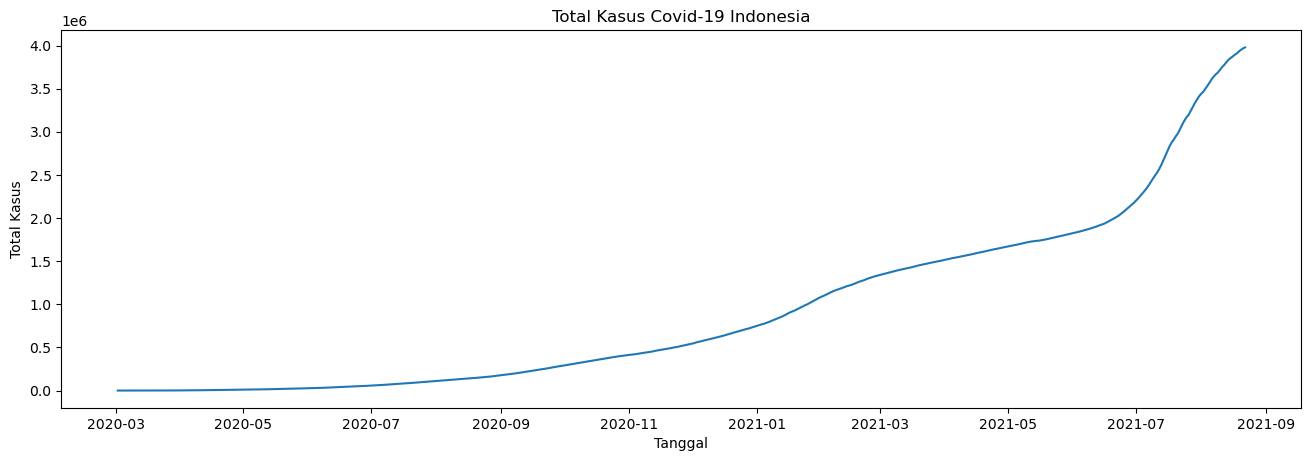

In [115]:
def plot_df(df, x, y, title="", xlabel='Tanggal', ylabel='Total Kasus', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Total kasus'], title='Total Kasus Covid-19 Indonesia')

## Kasus Harian Covid-19 Indonesia

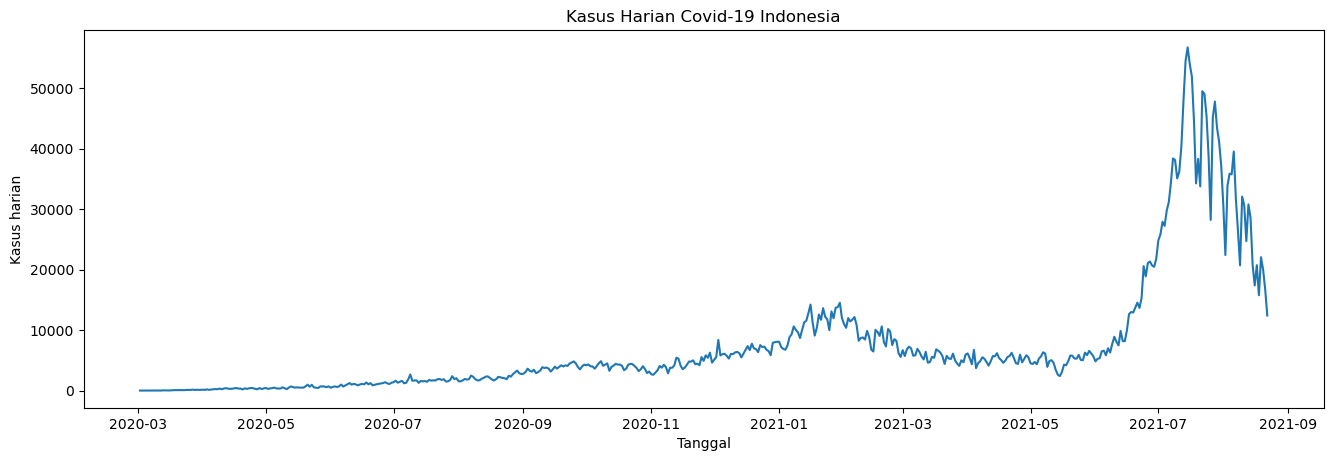

In [116]:
def plot_df(df, x, y, title="", xlabel='Tanggal', ylabel='Kasus harian', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Kasus harian'], title='Kasus Harian Covid-19 Indonesia')

In [117]:
df_kasusharian = df[['Kasus harian']]
df_kasusharian.loc[df_kasusharian[['Kasus harian']].idxmax()]

,Kasus harian
Tanggal,
2021-07-15,56757


Kasus harian tertinggi terjadi pada __15 Juni 2021__ dengan total __56757__ kasus dalam satu hari

In [118]:
df_kasusharian.tail(1)

,Kasus harian
Tanggal,
2021-08-22,12408


Per tanggal terbaru __22 Agustus 2021__ Kasus harian pada angka __12408__

## Kasus Aktif Covid-19 Indonesia

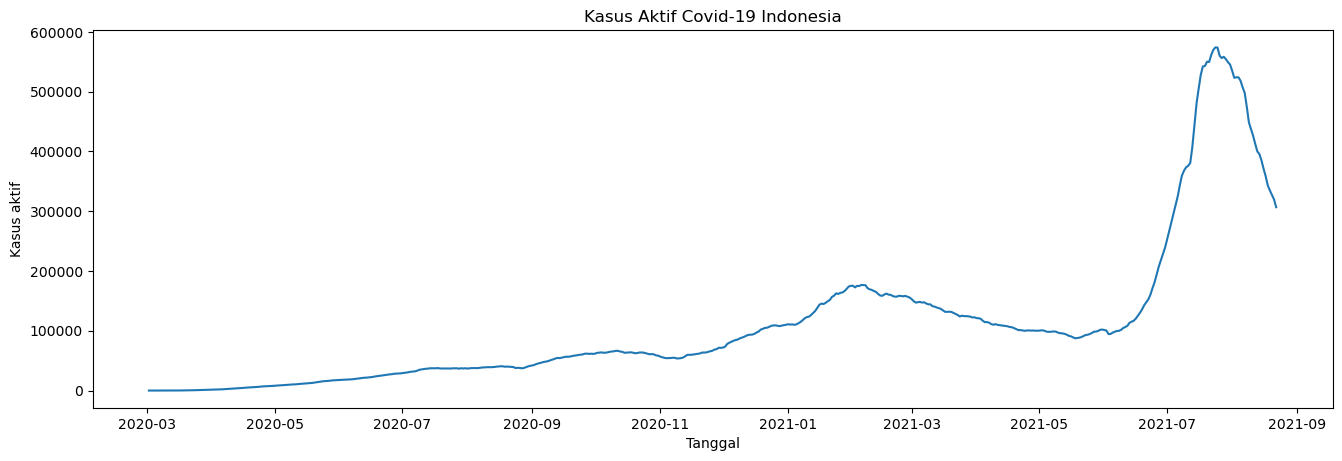

In [119]:
def plot_df(df, x, y, title="", xlabel='Tanggal', ylabel='Kasus aktif', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Kasus aktif'], title='Kasus Aktif Covid-19 Indonesia')

In [120]:
df_kasusaktif = df[['Kasus aktif']]
df_kasusaktif.loc[df_kasusaktif[['Kasus aktif']].idxmax()]

,Kasus aktif
Tanggal,
2021-07-24,574135


Kasus Aktif tertinggi terjadi pada __24 Juni 2021__ dengan total __574135__ Kasus

In [121]:
df_kasusaktif.tail(1)

,Kasus aktif
Tanggal,
2021-08-22,306760


Dan per __22 Agustus 2021__ terdapat __306760__ Kasus Aktif

## Persentase Kematian

In [122]:
df['persentase_kematian'] = df['Total Meninggal']/df['Total kasus']*100
df_persentase_kematian = df[['persentase_kematian']]

In [123]:
df_persentase_kematian.tail(1)

,persentase_kematian
Tanggal,
2021-08-22,3.17561


Persentase Kematian akibat Covid-19 di Indonesia ada pada angka __3.17%__

## Angka Kematian Covid-19 Indonesia

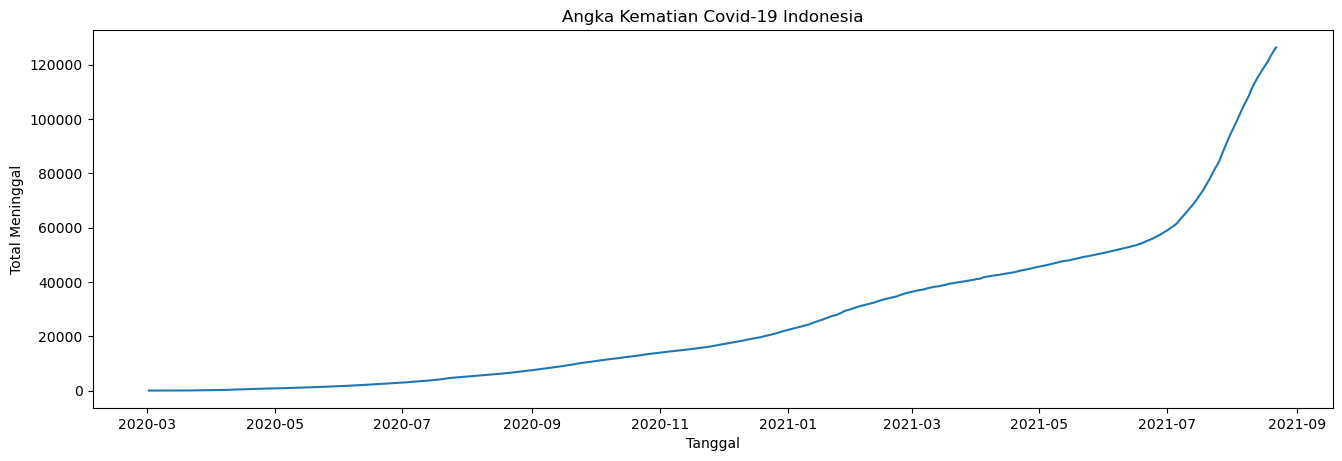

In [124]:
def plot_df(df, x, y, title="", xlabel='Tanggal', ylabel='Total Meninggal', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Total Meninggal'], title='Angka Kematian Covid-19 Indonesia')

In [125]:
df_total_meninggal=df[['Total Meninggal']]
df_total_meninggal.tail(1)

,Total Meninggal
Tanggal,
2021-08-22,126372


Angka kematian akibat Covid-19 di Indonesia terus meningkat, per tanggal 22 Agustus 2021 __126372__ telah meninggal akibat Covid-19

## Kematian Harian Covid-19 Indonesia

In [168]:
df_kematian_harian=df[['Meninggal Harian']]
df_kematian_harian.loc[df_kematian_harian.idxmax()]

,Meninggal Harian
Tanggal,
2021-07-27,2069


Kematian harian tertinggi terdapat pada Tanggal __27 Juli 2021__ dengan total __2069__ orang meninggal dalam sehari

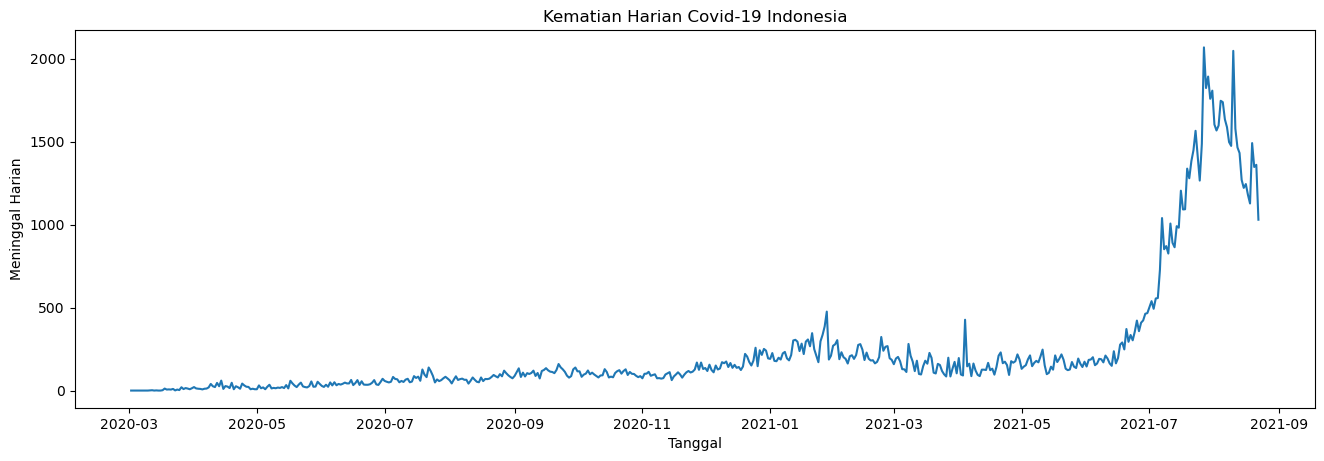

In [126]:
def plot_df(df, x, y, title="", xlabel='Tanggal', ylabel='Meninggal Harian', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Meninggal Harian'], title='Kematian Harian Covid-19 Indonesia')

## Vaksinasi Covid-19 Indonesia

In [127]:
df_vaksin = df[['Dosis pertama', 'Dosis kedua', 'Dosis ketiga']]
df_vaksin.tail(1)

,Dosis pertama,Dosis kedua,Dosis ketiga
Tanggal,,,
2021-08-22,57338901,31601400,424625


Terdapat __57.338.901__ masyarakat yang mendapat vaksin dosis pertama, __31.601.400__ mendapat vaksin dosis kedua dan __424625__ mendapat vaksin dosis ketiga

In [128]:
persentase_vaksin = df_vaksin['Dosis kedua'].tail(1)/271349889*100
persentase_vaksin

Tanggal
2021-08-22    11.645997
Name: Dosis kedua, dtype: float64

Total penduduk Indonesia menurut data BPS sebanyak 271.349.889. Dengan ini baru __11.6%__ penduduk mendapat vaksin penuh, yaitu vaksin Dosis kedua

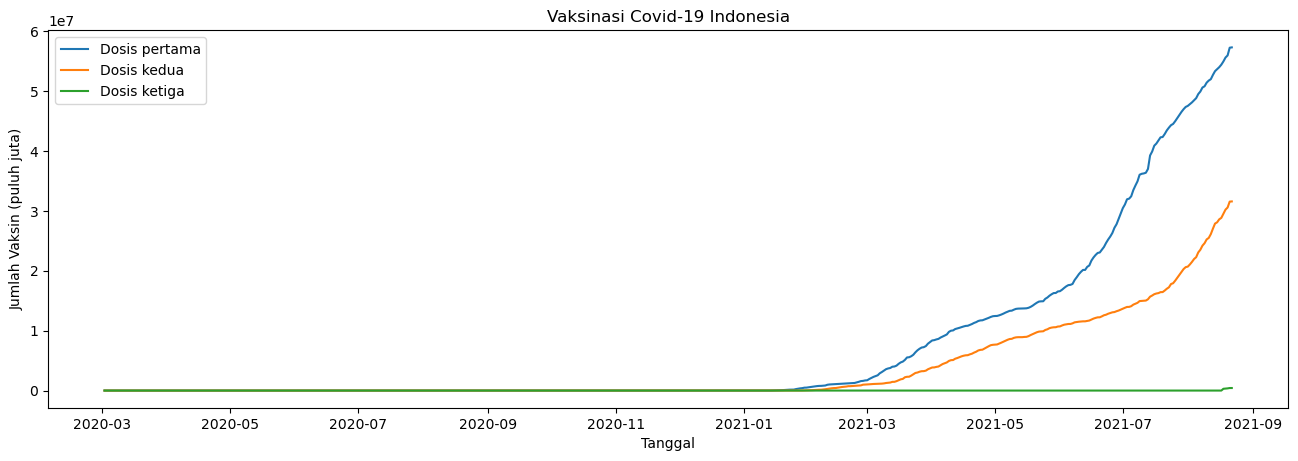

In [134]:
def plot_df(df_vaksin, x, y, title="", xlabel='Tanggal', ylabel='Jumlah Vaksin (puluh juta)', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend(['Dosis pertama', 'Dosis kedua', 'Dosis ketiga'])
    plt.show()

plot_df(df_vaksin, x=df_vaksin.index, y=df_vaksin[['Dosis pertama', 'Dosis kedua', 'Dosis ketiga']], title='Vaksinasi Covid-19 Indonesia')

Pada grafik dapat dilihat Vaksinasi Covid-19 di Indonesia baru dimulai pada awal tahun 2021

## Tes Covid-19 Indonesia

In [131]:
df_testcov = df[['Orang yang dites (PCR-TCM)', 'Orang yang dites (Antigen)']]
df_testcov.sum()

Orang yang dites (PCR-TCM)    6547306
Orang yang dites (Antigen)    6510771
dtype: int64

Terdapat total __6.547.306__ orang yang dites PCR-TM dan __6.510.771__ orang dites Antigen

In [158]:
df_testcov[['Orang yang dites (PCR-TCM)']].loc[df_testcov['Orang yang dites (PCR-TCM)'].idxmax()]

Orang yang dites (PCR-TCM)    119586
Name: 2021-07-15 00:00:00, dtype: int64

In [159]:
df_testcov[['Orang yang dites (Antigen)']].loc[df_testcov['Orang yang dites (Antigen)'].idxmax()]

Orang yang dites (Antigen)    124350
Name: 2021-07-22 00:00:00, dtype: int64

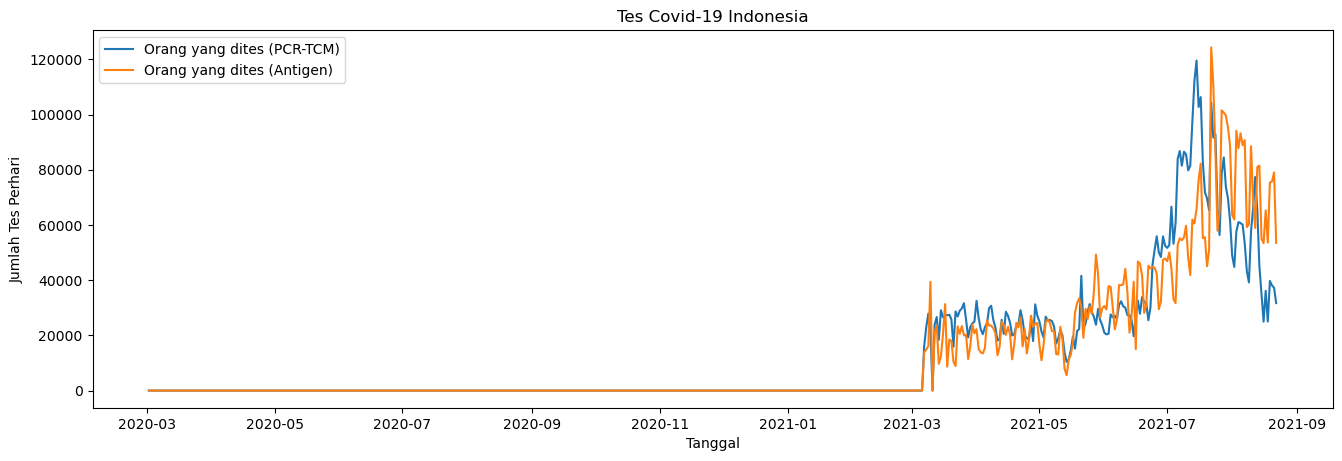

In [166]:
def plot_df(df_testcov, x, y, title="", xlabel='Tanggal', ylabel='Jumlah Tes Perhari', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend(['Orang yang dites (PCR-TCM)', 'Orang yang dites (Antigen)'])
    plt.show()

plot_df(df_testcov, x=df_vaksin.index, y=df_testcov[['Orang yang dites (PCR-TCM)', 'Orang yang dites (Antigen)']], title='Tes Covid-19 Indonesia')

Dilihat dari grafik di atas menunjukkan pencatatan tes Covid-19 di Indonesia baru dimulai pada bulan Maret 2021

# Kasus per Provinsi

In [225]:
df_prov = pd.read_csv('C-19 Indonesia Kasus Per Provinsi.csv')

In [226]:
df_prov.head()

,No,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
0,1.0,Aceh,29742.0,382.0,22261.0,255.0,1275.0,29.0,0.75,0.04,0.36
1,2.0,Bali,101557.0,849.0,88512.0,1197.0,3063.0,57.0,0.87,0.03,0.00
2,3.0,Banten,126699.0,374.0,117097.0,152.0,2555.0,6.0,0.92,0.02,0.42
3,4.0,Bangka Belitung,44079.0,393.0,38005.0,483.0,1084.0,13.0,0.86,0.03,0.50
4,5.0,Bengkulu,21872.0,71.0,18090.0,103.0,391.0,17.0,0.83,0.02,0.81


In [227]:
df_prov.drop('No',axis=1, inplace=True)

In [228]:
df_prov.shape

(36, 10)

In [230]:
df_prov.drop(df_prov.index[[34,35]], inplace=True)

In [231]:
df_prov.dtypes

Provinsi Asal             object
Kasus                    float64
Kasus Hari ini           float64
Sembuh                   float64
Sembuh Hari Ini          float64
Kematian                 float64
Meninggal Hari Ini       float64
RI                       float64
CFR                      float64
Rasio Lacak & Isolasi    float64
dtype: object

In [232]:
df.replace(np.nan, 0, inplace=True)
df_prov.tail()

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
29,Papua Barat,21827.0,22.0,20285.0,379.0,332.0,4.0,0.93,0.02,0.00
30,Papua,31217.0,187.0,18843.0,50.0,351.0,0.0,0.60,0.01,0.43
31,Sulawesi Barat,11043.0,109.0,9175.0,121.0,255.0,9.0,0.83,0.02,0.20
32,Nusa Tenggara Timur,56391.0,377.0,48967.0,595.0,1092.0,8.0,0.87,0.02,0.08
33,Gorontalo,10723.0,47.0,8974.0,120.0,380.0,9.0,0.84,0.04,0.43


In [241]:
df_prov

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
0,Aceh,29742.0,382.0,22261.0,255.0,1275.0,29.0,0.75,0.04,0.36
1,Bali,101557.0,849.0,88512.0,1197.0,3063.0,57.0,0.87,0.03,0.00
2,Banten,126699.0,374.0,117097.0,152.0,2555.0,6.0,0.92,0.02,0.42
3,Bangka Belitung,44079.0,393.0,38005.0,483.0,1084.0,13.0,0.86,0.03,0.50
4,Bengkulu,21872.0,71.0,18090.0,103.0,391.0,17.0,0.83,0.02,0.81
5,DI Yogyakarta,143825.0,930.0,120783.0,2547.0,4536.0,29.0,0.84,0.03,0.15
6,DKI Jakarta,845229.0,891.0,823286.0,915.0,13173.0,13.0,0.97,0.02,2.57
7,Jambi,26729.0,321.0,21822.0,194.0,614.0,9.0,0.82,0.02,0.16
8,Jawa Barat,667910.0,1747.0,603663.0,1654.0,12410.0,343.0,0.90,0.02,0.31
9,Jawa Tengah,461357.0,1236.0,405015.0,1514.0,27393.0,311.0,0.88,0.06,0.15


In [243]:
df.columns

Index(['Kasus harian', 'Total kasus', 'Kasus aktif', 'Sembuh Harian',
       'Total Sembuh', 'Meninggal Harian', 'Total Meninggal',
       'Jumlah orang diperiksa', 'Negatif', 'Spesimen (PCR-TCM)',
       'Spesimen (Antigen)', 'Orang yang dites (PCR-TCM)',
       'Orang yang dites (Antigen)', 'Dosis pertama', 'Dosis kedua',
       'Dosis ketiga'],
      dtype='object')

In [234]:
df_prov.describe()

,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,116677.882353,492.470588,103589.647059,676.794118,3686.529412,40.029412,0.842647,0.029706,0.467941
std,189383.438056,491.854452,177862.108916,723.674495,6593.867427,81.461084,0.074724,0.014031,0.567946
min,10723.000000,11.000000,8974.000000,50.000000,245.000000,0.000000,0.600000,0.010000,0.000000
25%,27482.250000,181.000000,21917.000000,176.750000,614.250000,5.250000,0.822500,0.020000,0.132500
50%,44270.500000,347.500000,36808.500000,453.500000,1238.000000,13.000000,0.855000,0.030000,0.285000
75%,101424.500000,645.250000,88478.500000,894.250000,2976.000000,29.000000,0.887500,0.030000,0.500000
max,845229.000000,2122.000000,823286.000000,3359.000000,27393.000000,343.000000,0.970000,0.070000,2.570000


In [237]:
df_prov[['Kasus','Sembuh', 'Kematian']].sum()

Kasus       3967048.0
Sembuh      3522048.0
Kematian     125342.0
dtype: float64

## 10 Provinsi dengan kasus terbanyak

In [247]:
df_prov.sort_values('Kasus', ascending=False).head(10)

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
6,DKI Jakarta,845229.0,891.0,823286.0,915.0,13173.0,13.0,0.97,0.02,2.57
8,Jawa Barat,667910.0,1747.0,603663.0,1654.0,12410.0,343.0,0.90,0.02,0.31
9,Jawa Tengah,461357.0,1236.0,405015.0,1514.0,27393.0,311.0,0.88,0.06,0.15
10,Jawa Timur,371091.0,2122.0,320185.0,3359.0,26490.0,213.0,0.86,0.07,0.26
12,Kalimantan Timur,145112.0,657.0,128891.0,1222.0,4805.0,37.0,0.89,0.03,2.02
5,DI Yogyakarta,143825.0,930.0,120783.0,2547.0,4536.0,29.0,0.84,0.03,0.15
2,Banten,126699.0,374.0,117097.0,152.0,2555.0,6.0,0.92,0.02,0.42
26,Riau,119003.0,610.0,106386.0,1119.0,3443.0,43.0,0.89,0.03,0.87
1,Bali,101557.0,849.0,88512.0,1197.0,3063.0,57.0,0.87,0.03,0.00
23,Sulawesi Selatan,101027.0,551.0,88378.0,975.0,1849.0,21.0,0.88,0.02,0.11


## 10 Provinsi dengan Kasus Hari Ini Terbanyak

In [239]:
df_prov.sort_values('Kasus Hari ini', ascending=False).head(10)

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
10,Jawa Timur,371091.0,2122.0,320185.0,3359.0,26490.0,213.0,0.86,0.07,0.26
8,Jawa Barat,667910.0,1747.0,603663.0,1654.0,12410.0,343.0,0.90,0.02,0.31
9,Jawa Tengah,461357.0,1236.0,405015.0,1514.0,27393.0,311.0,0.88,0.06,0.15
21,Sumatera Utara,88066.0,1189.0,58566.0,832.0,2090.0,39.0,0.67,0.02,0.00
5,DI Yogyakarta,143825.0,930.0,120783.0,2547.0,4536.0,29.0,0.84,0.03,0.15
6,DKI Jakarta,845229.0,891.0,823286.0,915.0,13173.0,13.0,0.97,0.02,2.57
1,Bali,101557.0,849.0,88512.0,1197.0,3063.0,57.0,0.87,0.03,0.00
14,Kalimantan Selatan,62517.0,705.0,49344.0,631.0,1953.0,27.0,0.79,0.03,0.10
12,Kalimantan Timur,145112.0,657.0,128891.0,1222.0,4805.0,37.0,0.89,0.03,2.02
26,Riau,119003.0,610.0,106386.0,1119.0,3443.0,43.0,0.89,0.03,0.87


## 10 Provinsi dengan Kematian Terbanyak

In [240]:
df_prov.sort_values('Kematian', ascending=False).head(10)

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi
9,Jawa Tengah,461357.0,1236.0,405015.0,1514.0,27393.0,311.0,0.88,0.06,0.15
10,Jawa Timur,371091.0,2122.0,320185.0,3359.0,26490.0,213.0,0.86,0.07,0.26
6,DKI Jakarta,845229.0,891.0,823286.0,915.0,13173.0,13.0,0.97,0.02,2.57
8,Jawa Barat,667910.0,1747.0,603663.0,1654.0,12410.0,343.0,0.90,0.02,0.31
12,Kalimantan Timur,145112.0,657.0,128891.0,1222.0,4805.0,37.0,0.89,0.03,2.02
5,DI Yogyakarta,143825.0,930.0,120783.0,2547.0,4536.0,29.0,0.84,0.03,0.15
26,Riau,119003.0,610.0,106386.0,1119.0,3443.0,43.0,0.89,0.03,0.87
25,Lampung,44462.0,319.0,35612.0,441.0,3208.0,15.0,0.80,0.07,0.20
1,Bali,101557.0,849.0,88512.0,1197.0,3063.0,57.0,0.87,0.03,0.00
18,Sumatera Selatan,56349.0,236.0,47497.0,466.0,2715.0,16.0,0.84,0.05,1.45


## 10 Provinsi dengan Persentase Kesembuhan Terbesar

In [249]:
df_prov['persentase_sembuh'] = df_prov['Sembuh']/df_prov['Kasus']*100
df_prov.sort_values('persentase_sembuh', ascending=False).head(10)

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi,persentase_sembuh
6,DKI Jakarta,845229.0,891.0,823286.0,915.0,13173.0,13.0,0.97,0.02,2.57,97.403899
29,Papua Barat,21827.0,22.0,20285.0,379.0,332.0,4.0,0.93,0.02,0.00,92.935355
16,Kepulauan Riau,51301.0,203.0,47548.0,240.0,1558.0,14.0,0.93,0.03,0.67,92.684353
2,Banten,126699.0,374.0,117097.0,152.0,2555.0,6.0,0.92,0.02,0.42,92.421408
17,Nusa Tenggara Barat,24406.0,134.0,22202.0,171.0,667.0,4.0,0.91,0.03,0.98,90.969434
8,Jawa Barat,667910.0,1747.0,603663.0,1654.0,12410.0,343.0,0.90,0.02,0.31,90.380890
11,Kalimantan Barat,33636.0,265.0,30306.0,528.0,879.0,12.0,0.90,0.03,0.50,90.099893
26,Riau,119003.0,610.0,106386.0,1119.0,3443.0,43.0,0.89,0.03,0.87,89.397746
12,Kalimantan Timur,145112.0,657.0,128891.0,1222.0,4805.0,37.0,0.89,0.03,2.02,88.821738
27,Maluku Utara,11379.0,35.0,10017.0,66.0,283.0,4.0,0.88,0.03,0.13,88.030583


## 10 Provinsi dengan Persentase Kematian terbesar

In [250]:
df_prov['persentase_kematian'] = df_prov['Kematian']/df_prov['Kasus']*100
df_prov.sort_values('persentase_kematian', ascending=False).head(10)

,Provinsi Asal,Kasus,Kasus Hari ini,Sembuh,Sembuh Hari Ini,Kematian,Meninggal Hari Ini,RI,CFR,Rasio Lacak & Isolasi,persentase_sembuh,persentase_kematian
25,Lampung,44462.0,319.0,35612.0,441.0,3208.0,15.0,0.80,0.07,0.20,80.095362,7.215150
10,Jawa Timur,371091.0,2122.0,320185.0,3359.0,26490.0,213.0,0.86,0.07,0.26,86.282071,7.138411
9,Jawa Tengah,461357.0,1236.0,405015.0,1514.0,27393.0,311.0,0.88,0.06,0.15,87.787765,5.937484
18,Sumatera Selatan,56349.0,236.0,47497.0,466.0,2715.0,16.0,0.84,0.05,1.45,84.290759,4.818187
0,Aceh,29742.0,382.0,22261.0,255.0,1275.0,29.0,0.75,0.04,0.36,74.847018,4.286867
33,Gorontalo,10723.0,47.0,8974.0,120.0,380.0,9.0,0.84,0.04,0.43,83.689266,3.543784
12,Kalimantan Timur,145112.0,657.0,128891.0,1222.0,4805.0,37.0,0.89,0.03,2.02,88.821738,3.311235
5,DI Yogyakarta,143825.0,930.0,120783.0,2547.0,4536.0,29.0,0.84,0.03,0.15,83.979141,3.153833
14,Kalimantan Selatan,62517.0,705.0,49344.0,631.0,1953.0,27.0,0.79,0.03,0.10,78.928931,3.123950
24,Sulawesi Tengah,38892.0,546.0,28203.0,577.0,1199.0,29.0,0.73,0.03,0.05,72.516199,3.082896
